In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

# Importing Purchase Behaviour Dataset

In [2]:
purchase_b=pd.read_csv('Downloads\QVI_purchase_behaviour.csv')

In [3]:
purchase_b.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
print('This data set contain {} rows and {} columns'.format(purchase_b.shape[0],purchase_b.shape[1]))

This data set contain 72637 rows and 3 columns


In [5]:
print('There are {} duplicated entries'.format(purchase_b.duplicated().sum()))

There are 0 duplicated entries


In [6]:
purchase_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


- There no Null values in purchase behaviour data
- we don't have to change the data type of columns, because all the columns have data type which we expect.

In [7]:
purchase_b.LIFESTAGE.unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [8]:
purchase_b.LIFESTAGE.value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

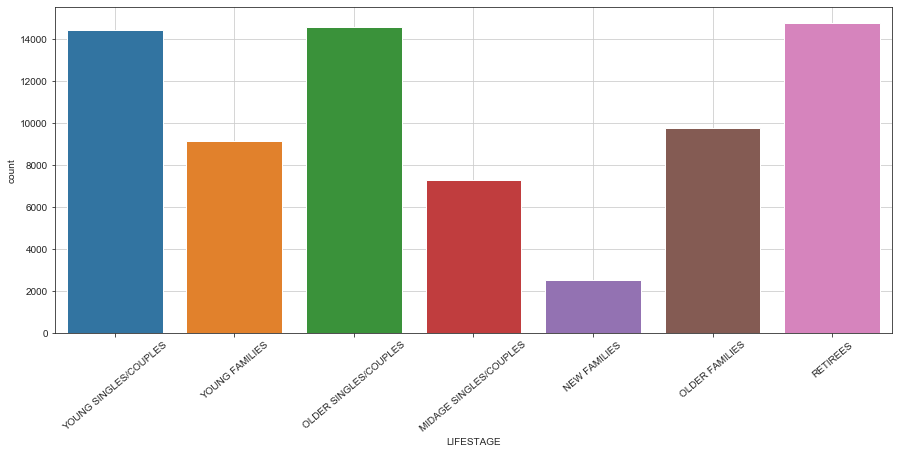

In [9]:
# ploting results
sns.set_style('ticks')
fig, ax = plot.subplots()
fig.set_size_inches(15, 6)
sns.countplot(purchase_b['LIFESTAGE'])
plot.xticks(rotation=40)
plot.grid()
plot.show()

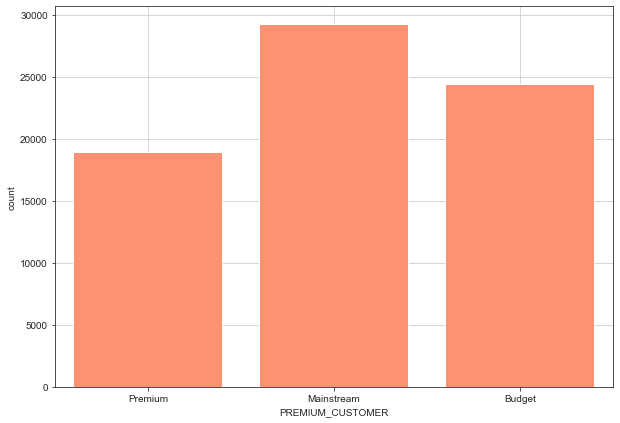

In [10]:
# plot
sns.set_style('ticks')
fig, ax = plot.subplots()
fig.set_size_inches(10, 7)
sns.countplot(purchase_b['PREMIUM_CUSTOMER'],color='#fc9272',saturation=1)
plot.grid()
plot.show()

# Importing Transaction Dataset

In [11]:
T_data=pd.read_csv('Downloads\QVI_transaction_data.csv')

In [12]:
T_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
print('This data set contain {} rows and {} columns'.format(T_data.shape[0],T_data.shape[1]))

This data set contain 264836 rows and 8 columns


In [14]:
print('There are {} duplicated entries'.format(T_data.duplicated().sum()))

There are 1 duplicated entries


In [15]:
T_data.drop_duplicates(inplace=True) # Droping duplicate value

In [16]:
print('There are now {} duplicated entries'.format(T_data.duplicated().sum())) 

There are now 0 duplicated entries


In [17]:
T_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264835 non-null  object 
 1   STORE_NBR       264835 non-null  int64  
 2   LYLTY_CARD_NBR  264835 non-null  float64
 3   TXN_ID          264835 non-null  float64
 4   PROD_NBR        264835 non-null  int64  
 5   PROD_NAME       264835 non-null  object 
 6   PROD_QTY        264835 non-null  int64  
 7   TOT_SALES       264835 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 18.2+ MB


In [18]:
T_data.PROD_NAME.value_counts().head()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Name: PROD_NAME, dtype: int64

In [19]:
T_data.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

# Problem-1
Define:
- We are looking at potato chips, but there are product like Salsa which we don't want.

# Solution
- Remove Products which are not chips

# Code

In [20]:
# Converting unwanted product to NaN value

T_data=T_data.replace(['Doritos Salsa Mild  300g','Red Rock Deli SR    Salsa & Mzzrlla 150g',
                        'Old El Paso Salsa   Dip Chnky Tom Ht300g','Old El Paso Salsa   Dip Tomato Med 300g'
                        ,'Old El Paso Salsa   Dip Tomato Mild 300g','Smiths Crinkle Cut  Tomato Salsa 150g','Woolworths Medium   Salsa 300g'
                        ,'Woolworths Mild     Salsa 300g'],np.nan)

In [21]:
# Then Removing NaN value

T_data.dropna(axis=0,inplace=True)

# Result

In [22]:
T_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [23]:
T_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248190 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            248190 non-null  object 
 1   STORE_NBR       248190 non-null  int64  
 2   LYLTY_CARD_NBR  248190 non-null  float64
 3   TXN_ID          248190 non-null  float64
 4   PROD_NBR        248190 non-null  int64  
 5   PROD_NAME       248190 non-null  object 
 6   PROD_QTY        248190 non-null  int64  
 7   TOT_SALES       248190 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 17.0+ MB


In [24]:
T_data.describe() #Summarise the data to check possible outliers

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,248190.000000,2.481900e+05,2.481900e+05,248190.000000,248190.000000,248190.000000
mean,135.066312,1.355443e+05,1.351466e+05,56.612503,1.907941,7.307235
std,76.777892,8.068408e+04,7.813696e+04,33.768738,0.658550,3.075273
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.002100e+04,6.760425e+04,27.000000,2.000000,5.800000
50%,130.000000,1.303700e+05,1.352005e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030848e+05,2.026568e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


product quantity appears to have an outlier
which we should investigate further. Let's investigate further the case where 200
packets of chips are bought in one transaction.


In [25]:
T_data[T_data['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000.0,226201.0,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000.0,226210.0,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer. 

# Problem-2
Define:
- There is Outlier a column called PROD_QTY.

# Solution
- Remove all the entires of PROD_QTY which is above 10

# Code

In [26]:
T_data.PROD_QTY.unique()

array([  2,   3,   5,   1,   4, 200], dtype=int64)

In [27]:
T_data=T_data[T_data['PROD_QTY']<=10]

# Result

In [28]:
T_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,248188.000000,2.481880e+05,2.481880e+05,248188.000000,248188.000000,248188.000000
mean,135.065579,1.355435e+05,1.351458e+05,56.612926,1.906345,7.302056
std,76.777768,8.068400e+04,7.813685e+04,33.768544,0.342742,2.475638
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.002100e+04,6.760375e+04,27.000000,2.000000,5.800000
50%,130.000000,1.303700e+05,1.351995e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026545e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [29]:
T_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149.0,3333.0,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196.0,3539.0,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026.0,4525.0,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150.0,6900.0,52,Grain Waves Sour Cream&Chives 210G,2,7.2
10,2019-05-17,7,7215.0,7176.0,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


We have entries from 2018-07-01 to 2019-06-30

In [30]:
# converting Date column in to datetime formate 

T_data['DATE'] = pd.to_datetime(T_data['DATE'], errors='coerce')
T_data['DATE'] = T_data['DATE'].dt.strftime('%Y-%m-%d')

In [31]:
# Sorting date in ascending order

T_data=T_data.sort_values(by=['DATE'],ascending=True)

In [32]:
T_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
21753,2018-07-01,155,155043.0,155282.0,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8
235990,2018-07-01,222,222040.0,221737.0,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
53456,2018-07-01,242,242226.0,246328.0,32,Kettle Sea Salt And Vinegar 175g,2,10.8
96751,2018-07-01,231,231122.0,234197.0,15,Twisties Cheese 270g,2,9.2
105900,2018-07-01,89,89003.0,88123.0,6,RRD Lime & Pepper 165g,1,3.0


In [33]:
# Spliting DATE column into year,month and days column
T_data['Year'] = pd.to_datetime(T_data['DATE'] ).dt.year
T_data['Month'] = pd.to_datetime(T_data['DATE'] ).dt.month
T_data['Days'] = pd.to_datetime(T_data['DATE'] ).dt.day

In [34]:
T_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,Days
21753,2018-07-01,155,155043.0,155282.0,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8,2018,7,1
235990,2018-07-01,222,222040.0,221737.0,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,7,1
53456,2018-07-01,242,242226.0,246328.0,32,Kettle Sea Salt And Vinegar 175g,2,10.8,2018,7,1
96751,2018-07-01,231,231122.0,234197.0,15,Twisties Cheese 270g,2,9.2,2018,7,1
105900,2018-07-01,89,89003.0,88123.0,6,RRD Lime & Pepper 165g,1,3.0,2018,7,1


# Explore Product Brand Names

In [35]:
T_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       23490
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27389
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

# Problem-3
Define:
- Some product brands are written in more than 1 way. Like Dorito and Doritos,Grain and GrnWves,Infuzions and Infzns and so on.
# Solution 
- Convert brand names which is written in different way into 1 way.
# Code

In [36]:
# spliting Product names and storing them into a new coloumn
T_data["Brand_Names"] = T_data["PROD_NAME"].str.split().str[0]


In [37]:
def clean_brand_names(line):
    brand = line["Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [38]:
T_data["Brand_Names"] = T_data.apply(lambda line: clean_brand_names(line), axis=1)

Text(0.5, 1.0, 'Overall Sales Of Brands')

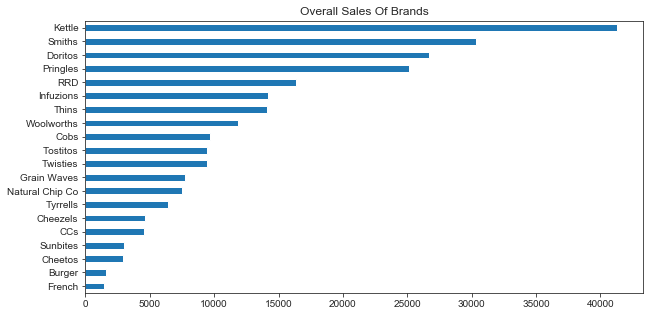

In [39]:
T_data["Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5))
plot.title('Overall Sales Of Brands')

# Explore Pakage Size

In [40]:
T_data["PROD_NAME"]=T_data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')

In [41]:
pak_size=T_data["PROD_NAME"].str.extract(r'([0-9]+[Gg])')[0].str.replace('g','').astype("float")

In [42]:
pak_size.describe()

count    242124.000000
mean        176.048545
std          60.602777
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64

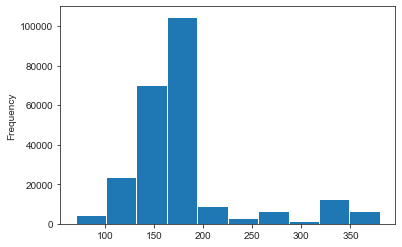

In [43]:
pak_size.plot.hist()

Product pack size looks reasonable with highest transaction frequency in mid-sized pack. Smallest size is 70g, and biggest size is 380g.

# Sales OF Chips In 2018

In [44]:
year_18=T_data[T_data['Year']==2018]
year_18.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,Days,Brand_Names
21753,2018-07-01,155,155043.0,155282.0,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8,2018,7,1,Woolworths
235990,2018-07-01,222,222040.0,221737.0,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,7,1,Doritos
53456,2018-07-01,242,242226.0,246328.0,32,Kettle Sea Salt And Vinegar 175g,2,10.8,2018,7,1,Kettle
96751,2018-07-01,231,231122.0,234197.0,15,Twisties Cheese 270g,2,9.2,2018,7,1,Twisties
105900,2018-07-01,89,89003.0,88123.0,6,RRD Lime & Pepper 165g,1,3.0,2018,7,1,RRD
67181,2018-07-01,223,223182.0,224013.0,101,Doritos Salsa Medium 300g,2,5.2,2018,7,1,Doritos
193334,2018-07-01,112,112204.0,115044.0,67,RRD Chilli& Coconut 150g,2,5.4,2018,7,1,RRD
57013,2018-07-01,33,33078.0,29927.0,11,RRD Pc Sea Salt 165g,2,6.0,2018,7,1,RRD
218976,2018-07-01,45,45183.0,41448.0,94,Burger Rings 220g,2,4.6,2018,7,1,Burger
39625,2018-07-01,86,86082.0,84643.0,3,Kettle Sensations Camembert & Fig 150g,2,9.2,2018,7,1,Kettle


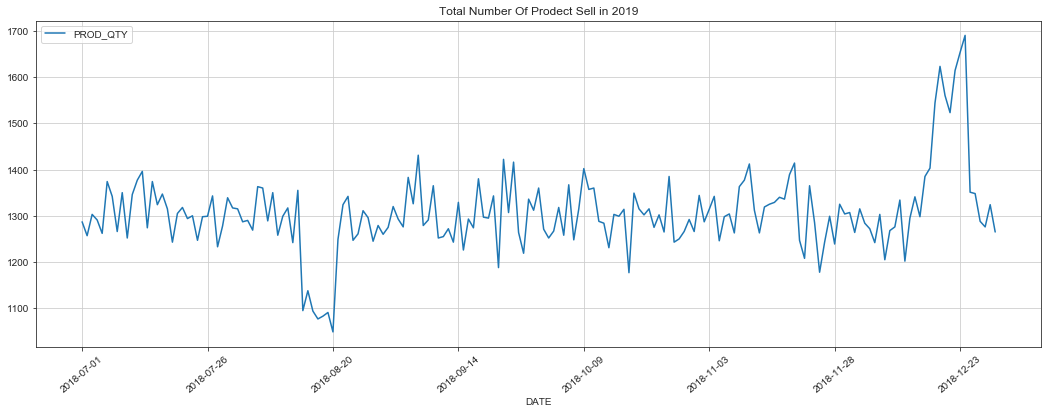

In [46]:
plot.figure(figsize=(18,6))
x=year_18.groupby('DATE')['PROD_QTY'].sum()
x.plot()
plot.xticks(rotation=40)
plot.title('Total Number Of Prodect Sell in 2019')
plot.grid()
plot.legend()

- In the year 2018, average 1300 packets of Chips were sell.
- Dramatic declined seen in month of August
- In December Rocket increase seen in sells

In [ ]:
year_18["Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5))
plot.title('Sales Of Brands in 2018')

# Sales OF Chips In 2019

In [ ]:
year_19=T_data[T_data['Year']==2019]
year_19.head()

In [ ]:
plot.figure(figsize=(18,6))
x=year_19.groupby('DATE')['PROD_QTY'].sum()
x.plot(color='red')
plot.title('Total Number Of Prodect Sell in 2019')
plot.grid()
plot.legend()

- In 2019 overall sell was increase as compared to 2018
- Extremely low number of Chip Packets sell in mid of May 

In [ ]:
year_19["Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5),color='red')
plot.title('Sales Of Brands in 2019')

In [ ]:
year_18.head()

# Merge Both DataFrames

In [ ]:
merged_data = pd.merge(purchase_b, T_data, on="LYLTY_CARD_NBR", how="right")
print(merged_data.head())

In [ ]:
merged_data.head()

In [ ]:
merged_data.info()

In [ ]:
group_s=pd.DataFrame(merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])["TOT_SALES"].agg(["sum", "mean"]))
group_s.sort_values(ascending=False, by="sum")

In [ ]:

group_s["sum"].sort_values().plot.barh(figsize=(12,7))

# Insights:

- Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.
- Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
- Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
- Chips brand Kettle is dominating every segment as the most purchased brand.
- Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
- Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.